# 2. Core concepts

In this notebook, we will review:
- What are estimators in _scikit-learn_, and some of their functions.
- How estimators can be supervised models that perform classification or regression tasks, as well as unsupervised models.
- Common metrics used to evaluate the estimator performance.

---

# Some important concepts

Let's quickly review some distinctions in Machine Learning (ML). This section is a refresher. If you are lacking some knowledge on these concepts, please consult our suggested reading in [Notebook 1](./01-preliminaries.ipynb).

## What machine learning is about
An excellent working definition of ML can be found in [Tal Yarkoni's tutorial](https://github.com/neurohackademy/nh2020-curriculum/blob/master/tu-machine-learning-yarkoni/02-core-concepts.ipynb): ML is the field of science/engineering that seeks to build systems capable of learning from experience. The goal of ML is to develop algorithms that can learn from data with a minimum set of explicetely programmed rules on how to do so.

There are two main types of ML models depending on how they learn from data: supervised and unsupervised.

## Supervised ML
In supervised ML, we have available the real values of the variables we want to predict. The model can then use this information to train itself by comparing its predicted values with the real ones using a __loss function__, and use __optimization algorithms__ to iteratively make small adjustments and improve its perfomance. 

### Regression vs classification
Supervised learning models can also be divided into regression and classification tasks. Regression models seek to predict a continuous variable (e.g. age), while classification models predict discrete labels (e.g. wine class).

## Unsupervised ML
In unsupervised ML, these labels are unkown. The algorithm instead seeks to find a pattern in the data that might be useful.


# Estimators

In _scikit-learn_ an [estimator](https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html#estimators-objects) is a Python object that __learns from data__. That means, both supervised (classification or regression) and unsupervised models can be constructed and fitted using estimators. We will review some properties of estimators in _scikit-learn_ using an example for each of these types of models.


## Linear Regression

A linear regression is an example of a supervised regression model. Used as a machine learning model, linear regression predicts the values of a continuous variable from a __linear combination__ of one or more features.

For example, if we had a feature matrix $X$ contaning the values of features $x1$ and $x2$, the value $\hat{y}$ predicted by linear regression could be expressed as:

$$\hat{y}_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2}$$

> - where $\beta$ are the parameters the model learns from the data to make the predictions
> - $\beta_1$ and $\beta_2$ are also called the coefficients, and $\beta_0$ the intercept

Let's now see how we can fit a linear regression model using _scikit-learn_. 


We will first need to create a dataset for this exercise. With _scikit-learn_ we can do so using the `make_regression()` function (read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)). Let's create one containing 400 samples and 100 features. We will also define 20 of these features as informative, and add some gaussian noise to the data to make the task harder for the model:

In [20]:
import numpy as np
from sklearn.datasets import make_regression

# Create fake dataset
X, y = make_regression(
    n_samples=400, n_features=100, n_informative=20, noise=10, random_state=0
)

# Print shape of feature matrix and labels
print(f"Shape of dataset: {np.shape(X)}")
print(f"Shape of labels: {np.shape(y)}")

Shape of dataset: (400, 100)
Shape of labels: (400,)


Since it's a regression problem, let's make sure the target of our model is a continuous variable. Let's print the first ten values of `y`:

In [21]:
print(y[:10])

[-258.45661829 -357.87561738  108.00450947   -8.40675451 -226.74854238
  -38.23202934   18.14753729 -821.27365083  320.76896452  145.63900011]


Now let's create a linear regression estimator using `LinearRegression` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)).

In [22]:
from sklearn.linear_model import LinearRegression

# Create model
reg = LinearRegression()

Estimator objects contain certain parameters that define how they will behave when learning the data, as well as their outputs. These are called __estimator parameters__. Let's inspect the ones of `reg`:

In [23]:
# Print estimator parameters
vars(reg)

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

These parameters can be changed by modifying their corresponding attributes when calling the estimator, or afterwards using `set_params()`:

In [24]:
# Set new model parameters
reg.set_params(**{"normalize": True})
vars(reg)

{'fit_intercept': True,
 'normalize': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

### Training the model

Once the estimator object has been created, it can now learn the value of its parameters from the data. For this we need to call the `fit()` function, and pass our feature matrix (`X`) and true values (`y`) as input:

In [25]:
# Fit linear regression model
reg = reg.fit(X, y)

Let's inspect the attributes of `reg` again:

In [26]:
# Print the names of the attributes
vars(reg).keys()

dict_keys(['fit_intercept', 'normalize', 'copy_X', 'n_jobs', 'positive', 'n_features_in_', 'coef_', '_residues', 'rank_', 'singular_', 'intercept_'])

`reg` now contains new attributes. These are refered to as __estimated parameters__, because they have been learned from the data. In _scikit-learn_, these are indexed by an underscore (`_`) at the end. 

For example, we can now access the coefficients learned by our linear model. We should have as many coefficients as features in our dataset:

In [27]:
print(f"Number of coefficients: {reg.coef_.shape[0]}")

Number of coefficients: 100


Let's also print the values of some of them, and the value of the intercept.

In [28]:
# Define coefficients and intercept
coefs = reg.coef_
intercept = reg.intercept_

# Print
print(f"Model coefficients (first 10):\n {coefs[:10]} \n")
print(f"Model intercept: \n {intercept}")

Model coefficients (first 10):
 [-1.13225733 -0.37761699 -0.55009782  0.11689833 -0.3783587   0.28209964
 -0.11756948 96.29011361 -1.00224858 81.99109074] 

Model intercept: 
 -0.49212396559274585


Be careful if your intention is to interpret the coefficients of the model. This process is far from straightforwards. Read this very useful [example](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html) to learn more about this problem.

### Making predictions with the model

Now that our model is fitted, we can use it to make predictions. In _scikit-learn_, this is achieved by calling the function `predict()`. 

Let's predict the values of `X` using our fitted model, and visually compare them to their real values on the first ten samples:

In [29]:
import pandas as pd

# Predict labels with trained model
y_pred = reg.predict(X)

# Create dataframe for printing the predictions
df = pd.DataFrame({"y_pred": y_pred[:10], "y_real": y[:10]})
df

,y_pred,y_real
0,-269.240138,-258.456618
1,-349.576199,-357.875617
2,106.003478,108.004509
3,-31.193701,-8.406755
4,-240.331344,-226.748542
5,-44.646219,-38.232029
6,3.240374,18.147537
7,-819.226112,-821.273651
8,322.174534,320.768965
9,158.470684,145.639000


### Scoring the model

We can use the predicted values to evaluate the performance of the model by quantifyng the difference between these and the real values.

In _scikit-learn_ we can evaluate the performance of the estimator using the function `score()`:

In [30]:
# Score the model using r2
score = reg.score(X, y)

# Print score
print(f"Linear model R2: {np.round(score,3)}")

Linear model R2: 0.999


By default, linear models are evaluated by calculating $R^2$, also called __coefficient of determination__. $R^2$ quantifies how much of the total variance of the outcome variable (`y`) is explained by the fitted model. The best possible value is 1. The higher the value, the best job the model does at explaining the data. You can read more about the implementation of $R^2$ in _scikit-learn_ [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).

#### ✍️ Exercise

There are other scoring metrics for regression problems. Check the module [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for an overview of the alternatives. Pick one, and implement it in the cell below. Press the three dots to reveal the solution.

_Hint!_ If you want to implement a scoring function that is not the default one, you won't be able to do so using the `score()` method. You will need to use a function specifically designed for the scoring metric, and pass the real and predicted values as input.

In [31]:
#### Answer using mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 72.48976618862778


## Logistic regression
__Logistic regression__ is a very popular classification model. It uses a [logistic function](https://en.wikipedia.org/wiki/Logistic_function) to estimate the probability that an observation belongs to different classes.

Let's implement a logistic regression is scikit-learn.

We will create a fake dataset ready for classification using the `make_classification` method (read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)): 

In [32]:
from sklearn.datasets import make_classification

# Create fake dataset
X, y = make_classification(
    n_samples=400, n_features=100, n_informative=20, random_state=0
)

Our `y` should now be a categorical variable. Let's print 10 samples of it to make sure:

In [33]:
print(y[:10])

[1 0 0 1 0 1 1 0 1 1]


Classifiers are also estimators in _scikit-learn_. This means we can also use them with the functions illustrated for the linear regression case.

Let's create a `LogisticRegression` estimator (read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)), and fit it to our data:

In [34]:
from sklearn.linear_model import LogisticRegression

# Create model
clf = LogisticRegression()

# Fit model
clf = clf.fit(X, y)

#### ✍️ Exercise

Can you compare the first 10 predictions of the fitted model to their real values?  Write your answer in the cell below, and press the three dots to reveal the solution.

In [35]:
#### Answer
# Predict labels with trained model
y_pred = clf.predict(X[:10])
y_real = y[:10]

# Create dataframe for printing the predictions
df = pd.DataFrame({"y_pred": y_pred, "y_real": y_real})
df

,y_pred,y_real
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,0,1
7,0,0
8,1,1
9,1,1


### Probabilistic predictions

Logistic Regression is a [probabilistic classifier](https://en.wikipedia.org/wiki/Probabilistic_classification), meaning it predicts a probability distribution over the classes.

In _scikit-learn_ we can inspect the probabilities assigned to each class using `predict_proba()`:

In [36]:
# Predict the probability of each class
y_pred_proba = clf.predict_proba(X[:10])

# Create dataframe for printing the predictions for each class
df = pd.DataFrame(y_pred_proba, columns=["class 0", "class 1"])
df

,class 0,class 1
0,0.388956,0.611044
1,0.786049,0.213951
2,0.971892,0.028108
3,0.052677,0.947323
4,0.664012,0.335988
5,0.015693,0.984307
6,0.661506,0.338494
7,0.992583,0.007417
8,0.045168,0.954832
9,0.027215,0.972785


By default, the predictions made by `LogisticRegression` when calling `score()` are evaluated by computing the __mean accuracy__ of the predictions:

In [37]:
# Score predictions
score = clf.score(X, y)
print(f"Mean accuracy: {np.round(score, 2)}")

Mean accuracy: 0.86


Besides scoring the model, in classification problems it is very common to plot the __confusion matrix__ of the predictions. You can go over our [optional material](#Optional-material) to explore this topic.

## K-Means

Unsupervised models are also estimators in _scikit-learn_, since they also learn from data. One type of unsupervised models are __clustering algorithms__. These learn to group the data from their feature values so that observations within a group are more similar than those between groups. You can read more about clustering [here](https://github.com/martinagvilas/intro_stat_learning/blob/master/notebooks/lab2_clustering.ipynb).

A very popular clustering algorithm is __k-means__. This method partitions the data into $k$ pre-specified clusters in a way that minimizes the within-cluster variance.

Let's implement k-means using _scikit-learn_. We first need to generate a dataset suitable for clustering using `make_blobs()` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)) which generates Gaussian shaped blobs. We will create a very simple dataset with only two features, to simplify visualization of the clusters:

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Create fake dataset
X, y = make_blobs(
    n_samples=400, n_features=2, random_state=0, cluster_std=1
)

Let's visualize our dataset with a scatterplot, and color the observations according to their real labels:

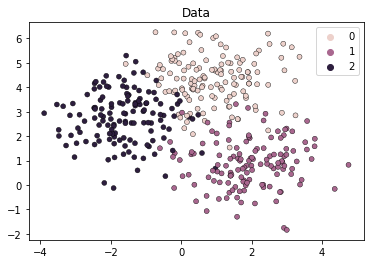

In [39]:
# Plot dataset
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=True
).set_title("Data")
plt.show()

There are 3 clusters in our fake dataset. Usually we don't have this information beforehand, and we need to select an arbitrary number of clusters for the algorithm to find.

Let's see an example of this and perform k-means clustering by calling `KMeans` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)) with 5 clusters ($k=5$):

In [40]:
from sklearn.cluster import KMeans

# Create model
kmeans = KMeans(n_clusters=5)

# Fit model
kmeans = kmeans.fit(X)

Since this is an unsupervised method and there is often no true labels, we don't need to provide `y` as input to `fit()`. We also cannot compute the accuracy of the fitted model. But we can compute the average distance of the labeled example to the center of their assigned cluster using the `score()` function:

In [41]:
# Compute average distance
score = kmeans.score(X, y)
print(f"Average distance: {score}")

Average distance: -497.67906822516085


If you want to read more about the meaning behind the returned value, read [this answer](https://stackoverflow.com/questions/32370543/understanding-score-returned-by-scikit-learn-kmeans) on stackoverflow.

More importantly, we can now use our fitted model to predict to which cluster the observations belong to. Let's predict the assignment of the first 10 observations:

In [42]:
# Predict cluster label
y_pred = kmeans.predict(X)
print(f"Predicted labels (first 10): {y_pred[:10]}")

Predicted labels (first 10): [1 1 0 2 3 0 0 3 3 4]


We can use a scatterplot to inspect the predicted labels from the model:

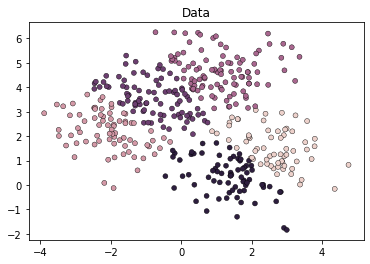

In [43]:
# Plot predicted labels
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y_pred,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

We have the same number of predicted labels as the number of $k$.

### ✍️ Exercise 

Can you create a `KMeans` model specifying the correct number of clusters (`k=3`) and plot its predictions? Compare it with the plot of the real labels. Write your code in the cell below and press the three dots to see the solution.

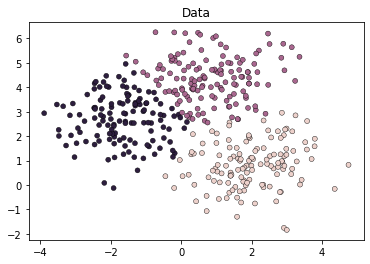

In [44]:
#Answer
# Create model
kmeans = KMeans(n_clusters=3)

# Fit model
kmeans = kmeans.fit(X, y)

# Predict labels
y_pred = kmeans.predict(X)

# Plot predicted labels
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y_pred,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

# ✏️ Check your knowledge

Load the ABIDE 2 dataset and:

1. Use logistic regression to predict `group` from the features encoding brain data. How accurate is the model? Play around with different accuracy metrics and inspect their results.
2. Select two features encoding brain data, run a clustering analysis on them, and plot the predicted labels as shown in this notebook. Compare it with a similar plot displaying the true group labels.


# Additional reading

- [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html): A useful map to decide which estimator is best given your dataset and learning goal.
- [Core concepts of machine learning](https://github.com/neurohackademy/nh2020-curriculum/blob/master/tu-machine-learning-yarkoni/02-core-concepts.ipynb)  by _Tal Yarkoni_.

# Optional material

## Confusion matrix

Given true and predicted values, a confusion matrix displays:
- the __true positives__

We will now learn how to calculate and display a confusion matrix in _scikit-learn_. 

We will first create an imbalanced classification dataset, meaning one containing more samples from one of the classes than the other. This dataset will make the example more interesting. We can create the imbalance with the parameter `weights` of `make_classification()`: 

In [ ]:
# Create dataset
X, y = make_classification(
    n_samples=400, n_features=100, n_informative=20, 
    weights=[0.8, 0.2], random_state=0
)

Let's now create and fit a logistic regression model, and use it to make predictions.

In [ ]:
# Create and fit model
clf = LogisticRegression().fit(X, y)

# Use model to make predictions
y_pred = clf.predict(X)

Using the predicted labels, we can now run this computation using the function `confusion_matrix` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)), and display it using `ConfusionMatrixDisplay` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)):

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y, y_pred, labels=clf.classes_)
cm_display = ConfusionMatrixDisplay(conf_matrix).plot()

(...) Explain output

#### ✍️ Exercise

There are other ways of scoring your model besides computing its mean accuracy. Read the documentation about scoring the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) and the [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) of a model. 

Can you implement these score functions yourself? Try them below, and press the three dots to reveal the solution.

In [ ]:
# Answer
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y, y_pred)
print(f"Recall: {recall}")